In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("DATA TERKLASIFIKASI.xlsx")
data.head(8)

,sentimen,text
0,negatif,Setiap hari kan gw cuma butuh bayar parkir 12r...
1,positif,21:31 Situasi Lalin keluar GT.Serang Timur mas...
2,positif,@bambangpriyad1 @RadioElshinta @adriayudi17 ma...
3,negatif,"@bewekumis @PTJASAMARGA pasti, biar gak bikin ..."
4,positif,@olied_alied @TMCPoldaMetro @PTJASAMARGA gak u...
5,positif,@TasyaKumala88 @daengmanrabia @e100ss itu past...
6,positif,"@lisnasution @r3dsnot di indomaret belum kok, ..."
7,positif,@RadioElshinta @adriayudi17 yang begini nih ya...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  658 non-null    object
 1   text      658 non-null    object
dtypes: object(2)
memory usage: 10.4+ KB


In [4]:
data.groupby('sentimen').describe().T
#terdapat data duplikat

sentimen                         negatif  ...                                           positif 
text count                           268  ...                                                  9
     unique                          263  ...                                                  9
     top     e toll kuoontooool skaoskod  ...  Tongcard Tongtol Tongkat E Toll Tongk... https...
     freq                              2  ...                                                  1

[4 rows x 3 columns]

In [5]:
data.isnull().sum()

sentimen    0
text        0
dtype: int64

In [6]:
print(data.duplicated().sum())#cek duplicated data
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

9
0


positif     377
negatif     263
positif       9
Name: sentimen, dtype: int64


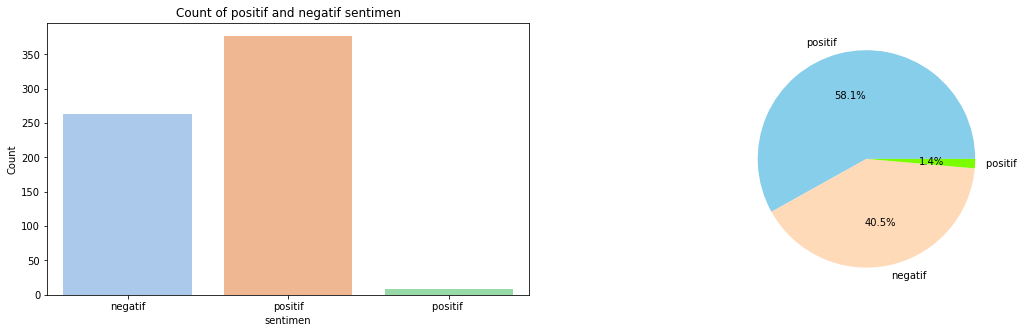

In [7]:
#EDA VISUALIZATION
print(data["sentimen"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(data.sentimen,ax=ax[0],palette="pastel");
g1.set_title("Count of positif and negatif sentimen")
g1.set_ylabel("Count")
g1.set_xlabel("sentimen")
g2 = plt.pie(data["sentimen"].value_counts().values,explode=[0,0,0],labels=data.sentimen.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff','lawngreen'])
fig.show()



In [8]:
for col in data: #berikut adalah sebaran nilainya
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom sentimen:
positif     377
negatif     263
positif       9
Name: sentimen, dtype: int64

Value count kolom text:
RT @tribunnews: E-toll Sering Bermasalah, Maryono: Ingat Ditempel Bukan Digesek! https://t.co/YXhiRC3IoE via @Tribunnews                        2
@etalasebisnisid ini juga tips yang bagus untuk pengguna e toll card, jadi bisa menggunakan e toll card dengan bijak                            1
Saya #SukaKemewahan Naik Angkot Bayar nya pake e-toll                                                                                           1
Heeh sih make E-Toll teh jd gancang pelayanan na, tp anying hese rek top up ge bareak dimana mana!                                              1
e-toll SUCKS!! ga nolong tuh kemaren, malah ikutan jadi biang macet juga                                                                        1
                                                                                                                                            

In [9]:
import re
import collections
ticker_pattern = re.compile(r'(^\$[A-Z]+|^\$ES_F)')
ht_pattern = re.compile(r'#\w+')

ticker_dic = collections.defaultdict(int)
ht_dic = collections.defaultdict(int)

for text in data['text']:
    for word in text.split():
        if ticker_pattern.fullmatch(word) is not None:
            ticker_dic[word[1:]] += 1
        
        word = word.lower()
        if ht_pattern.fullmatch(word) is not None:
            ht_dic[word] += 1

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

charonly = re.compile(r'[^a-zA-Z\s]')
handle_pattern = re.compile(r'@\w+')
emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        "]+", flags=re.UNICODE)
url_pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
pic_pattern = re.compile('pic\.twitter\.com/.{10}')
special_code = re.compile(r'(&amp;|&gt;|&lt;)')
tag_pattern = re.compile(r'<.*?>')

STOPWORDS = set(stopwords.words('indonesian')).union({'rt', 'retweet', 'RT', 'Retweet', 'RETWEET'})

lemmatizer = WordNetLemmatizer()

def hashtag(phrase):
    return ht_pattern.sub(' ', phrase)

def remove_ticker(phrase):
    return ticker_pattern.sub('', phrase)
    
def specialcode(phrase):
    return special_code.sub(' ', phrase)

def emoji(phrase):
    return emoji_pattern.sub(' ', phrase)

def url(phrase):
    return url_pattern.sub('', phrase)

def pic(phrase):
    return pic_pattern.sub('', phrase)

def html_tag(phrase):
    return tag_pattern.sub(' ', phrase)

def handle(phrase):
    return handle_pattern.sub('', phrase)

def onlychar(phrase):
    return charonly.sub('', phrase)

def remove_stopwords(phrase):
    return " ".join([word for word in str(phrase).split()\
                     if word not in STOPWORDS])

def tokenize_stem(phrase):   
    tokens = word_tokenize(phrase)
    stem_words =[]
    for token in tokens:
        word = lemmatizer.lemmatize(token)
        stem_words.append(word)        
    buf = ' '.join(stem_words)    
    return buf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
def arrange_text(data):
    data['text'] = data['text'].apply(emoji)
    data['text'] = data['text'].apply(handle)
    data['text'] = data['text'].apply(specialcode)
    data['text'] = data['text'].apply(hashtag)
    data['text'] = data['text'].apply(url)
    data['text'] = data['text'].apply(pic)
    data['text'] = data['text'].apply(html_tag)
    data['text'] = data['text'].apply(onlychar)
    data['text'] = data['text'].apply(tokenize_stem)
    data['text'] = data['text'].apply(remove_stopwords)
arrange_text(data)

In [12]:
for col in data: #berikut adalah sebaran nilai terupdate
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom sentimen:
positif     377
negatif     263
positif       9
Name: sentimen, dtype: int64

Value count kolom text:
EToll Sering Tertukar Ini Solusinya                                                                  7
Mesin EToll Lama Membaca Kartu Begini Cara Mengatasinya                                              7
Etoll Sering Bermasalah Maryono Ingat Ditempel Bukan Digesek                                         4
VIRAL Seorang pemuda kehabisan EToll nekat gila supir truk gardu tol                                 4
Cara Top Up EToll Indomaret Card Lewat SMS Banking Mandiri                                           3
                                                                                                    ..
yoi om kalo kehabisan saldo etoll berabe diklaksonin orang dijalan tol bikin emosi                   1
gue masuk tol dr bandung cipali nih mom Keluar tol sumberjaya majalengka gerbang gue ngetap etoll    1
Min top up etoll gangguan Gangguannya sampe th

In [13]:
print(data.duplicated().sum())#cek duplicated data terupdate
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

56
0


In [14]:
from itertools import chain
from collections import Counter

list_words = data['text'].str.split()
list_words_merge = list(chain(*list_words))

d = Counter(list_words_merge)
df = pd.DataFrame(data=d, index=['count'])
top_common_words = df.T.sort_values(by=['count'], ascending=False).reset_index().head(50)
top_common_words.head()

,index,count
0,etoll,268
1,toll,182
2,e,171
3,tol,127
4,yg,88


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

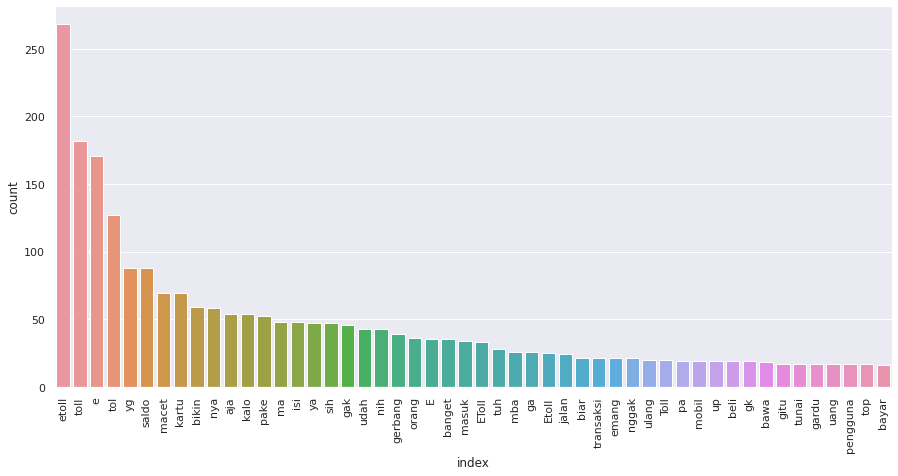

In [15]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.barplot(x="index", y='count', data=top_common_words)
plt.xticks(rotation=90)

In [16]:
string = ' '.join(data['text'])
str_val = string.split(" ")

In [17]:
#bigram analysis
data_bigram=(pd.Series(nltk.ngrams(str_val, 2)).value_counts())[:30]
data_bigram_df=pd.DataFrame(data_bigram)
data_bigram_df = data_bigram_df.reset_index()
data_bigram_df = data_bigram_df.rename(columns={"index": "key", 0: "value"})
data_bigram_df.head(10)

,key,value
0,"(e, toll)",143
1,"(bikin, macet)",34
2,"(saldo, etoll)",30
3,"(gerbang, tol)",29
4,"(kartu, etoll)",28
5,"(etoll, nya)",27
6,"(isi, ulang)",18
7,"(isi, saldo)",18
8,"(top, up)",17
9,"(saldo, e)",17


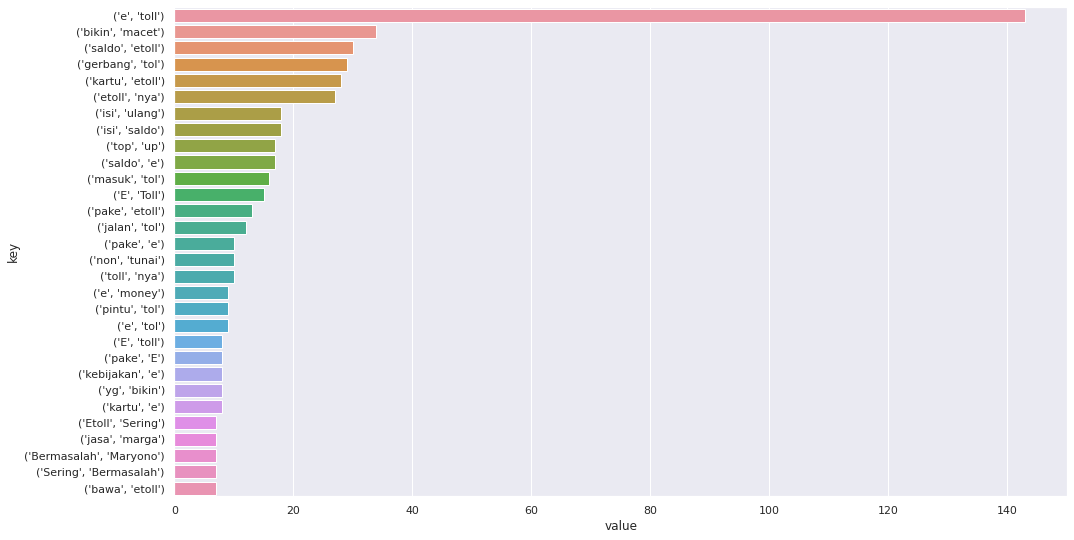

In [18]:
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_bigram_df)

In [19]:
#trigram analysis
data_trigram=(pd.Series(nltk.ngrams(str_val, 3)).value_counts())[:30]
data_trigram_df=pd.DataFrame(data_trigram)
data_trigram_df = data_trigram_df.reset_index()
data_trigram_df = data_trigram_df.rename(columns={"index": "key", 0: "value"})
data_trigram_df.head(10)

,key,value
0,"(saldo, e, toll)",15
1,"(kebijakan, e, toll)",8
2,"(e, toll, nya)",8
3,"(pake, e, toll)",8
4,"(saldo, etoll, nya)",8
5,"(Sering, Bermasalah, Maryono)",7
6,"(yg, bikin, macet)",7
7,"(Bermasalah, Maryono, Ingat)",7
8,"(Etoll, Sering, Bermasalah)",7
9,"(isi, saldo, e)",6


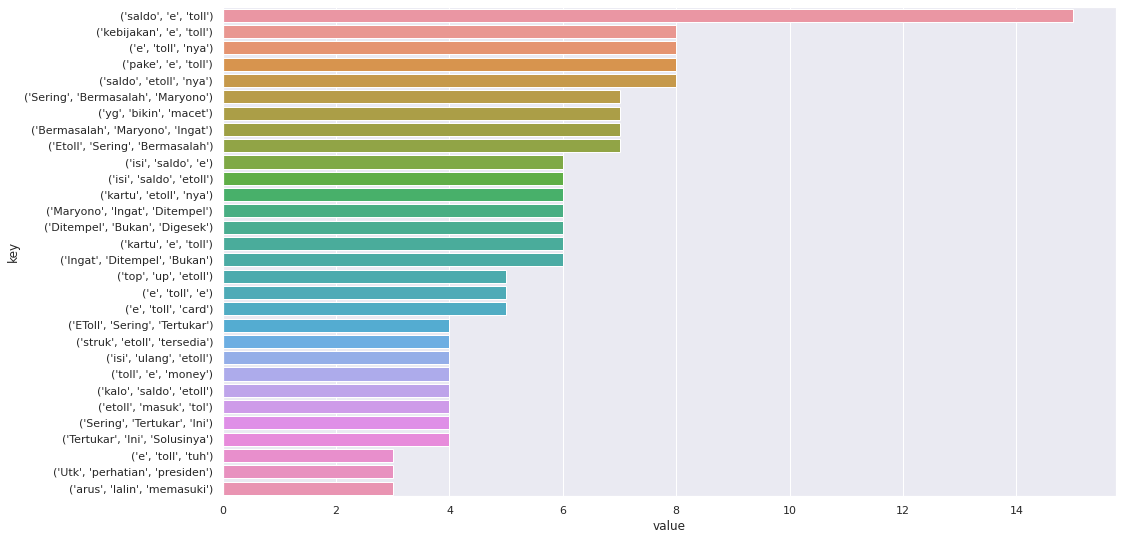

In [20]:
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_trigram_df)

In [21]:
# Creating Frequency
text_series = pd.Series(string.split())
freq_comm = text_series.value_counts()
freq_comm

etoll            268
toll             182
e                171
tol              127
saldo             88
                ... 
oooppsssetoll      1
Ruas               1
DiPHK              1
ajasih             1
Loh                1
Length: 2064, dtype: int64

In [22]:
rare_words = freq_comm[-1329:-1]
'rattlecrackle' in rare_words
rare_words

ter              1
booking          1
betmen           1
gantungan        1
debit            1
                ..
limitga          1
oooppsssetoll    1
Ruas             1
DiPHK            1
ajasih           1
Length: 1328, dtype: int64

In [23]:
# Removing 1328 rare occuring words 
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in rare_words]))
data['text'].head(10)

0    gw butuh bayar rb pake cash pakai etoll bayar ...
1    Situasi Lalin GTSerang Timur LANCAR Pastikan S...
2                        manusia kemajuan tekhnologi k
3    biar gak bikin macet dijalan toll saldo etoll ...
4       gak pake riset ma pengguna kartu etoll detik b
5                                  eror ma kartu etoll
6                       indomaret mba sesuai kebijakan
7    nih bikin emosi banget diatur nya orang diajak...
8    om alfa indo banget jual kartu etoll pengendar...
9    om kalo kehabisan saldo etoll orang dijalan to...
Name: text, dtype: object

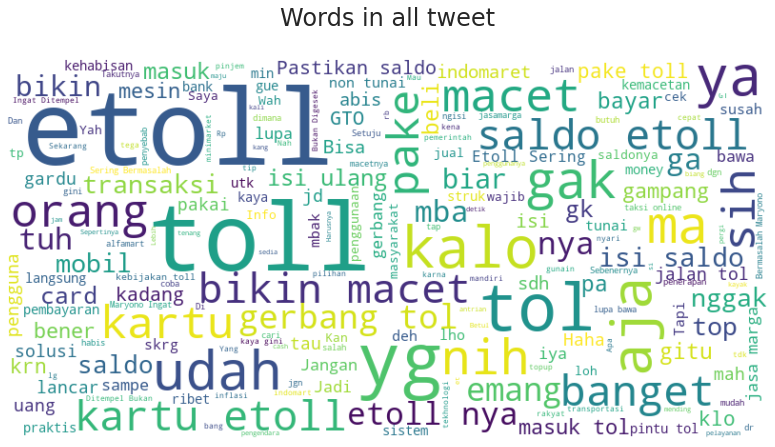

In [24]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

words = ' '.join([text for text in data['text']])
wordcloud = WordCloud(
    width=800, height=400, background_color='white', max_font_size=110)\
    .generate(words)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Words in all tweet\n', fontsize=24)
plt.axis('off')
plt.show()
#karena tidak terlalu ada perbedaan jika ditampilkan dalam wordcloud untuk sentimen positif/negatif maka ditampilkan keseluruhan tweet

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
X = data['text']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state = 75)
rf.fit(X_train_tfidf, y_train)
print(classification_report(y_test, rf.predict(X_test_tfidf)))

              precision    recall  f1-score   support

     negatif       0.58      0.37      0.45        49
     positif       0.62      0.82      0.71        67
    positif        0.00      0.00      0.00         3

    accuracy                           0.61       119
   macro avg       0.40      0.40      0.39       119
weighted avg       0.59      0.61      0.58       119



In [27]:
rf3 = RandomForestClassifier(class_weight = 'balanced')
rf3.fit(X_train_tfidf, y_train)
print(classification_report(y_test, rf3.predict(X_test_tfidf)))

              precision    recall  f1-score   support

     negatif       0.64      0.65      0.65        49
     positif       0.72      0.75      0.74        67
    positif        0.00      0.00      0.00         3

    accuracy                           0.69       119
   macro avg       0.45      0.47      0.46       119
weighted avg       0.67      0.69      0.68       119



In [28]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train_tfidf, y_train)
print(classification_report(y_test, NB.predict(X_test_tfidf)))

              precision    recall  f1-score   support

     negatif       0.74      0.35      0.47        49
     positif       0.64      0.91      0.75        67
    positif        0.00      0.00      0.00         3

    accuracy                           0.66       119
   macro avg       0.46      0.42      0.41       119
weighted avg       0.66      0.66      0.62       119



In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=75)
lr.fit(X_train_tfidf, y_train)
print(classification_report(y_test, lr.predict(X_test_tfidf)))
#terlihat ketika label terbagi menjadi 3 klasifikasi akan menghasilkan akurasi yang buruk untuk dari itu coba kita buat 2 label saja

              precision    recall  f1-score   support

     negatif       0.57      0.41      0.48        49
     positif       0.63      0.79      0.70        67
    positif        0.00      0.00      0.00         3

    accuracy                           0.61       119
   macro avg       0.40      0.40      0.39       119
weighted avg       0.59      0.61      0.59       119



In [30]:
encode = {"sentimen":{"positif": 1, "negatif": 0,"positif":2}}#coba proses LSTM MODEL
data = data.replace(encode)
data.tail()

,sentimen,text
653,0,Etoll mengurangi kemacetan Mau toll aja
654,2,Situasi lalin memasuki transaksi GT Kembangan ...
655,0,sih make EToll jd pelayanan tp top up dimana
656,0,Min top up etoll gangguan sampe
657,0,kemacetan


In [31]:
data["sentimen"] = pd.to_numeric(data["sentimen"], errors='coerce')#CHANGE DTYPE TO INT

In [32]:
data.info()#kita hapus yang missing 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 0 to 657
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sentimen  585 non-null    float64
 1   text      593 non-null    object 
dtypes: float64(1), object(1)
memory usage: 13.9+ KB


In [33]:
data.dropna(inplace=True)#hapus nan

In [35]:
data.groupby('sentimen').describe().reset_index()

sentimen  text                                                               
           count unique                                                top freq
0      0.0   237    232  Elviana terkait uang Etoll yg mengendap kartu ...    2
1      2.0   348    347  EToll Sering Tertukar Ini Solusinya Adanya per...    2

In [36]:
print(data.duplicated().sum())#cek duplicated data
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

6
0


In [48]:
retarget = {0.0: 0, 2.0: 1}
data['sentimen'] = data['sentimen'].map(retarget)

In [49]:
data['sentimen']#sudah benar

0      0
1      1
2      1
3      0
4      1
      ..
653    0
654    1
655    0
656    0
657    0
Name: sentimen, Length: 579, dtype: int64

In [59]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data['text'], data['sentimen'], random_state=95)

In [60]:
#lstm model
import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout

max_features = 1000
maxlen = 300

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train1)
tokenized_train = tokenizer.texts_to_sequences(X_train1)
X_train1 = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

tokenized_test = tokenizer.texts_to_sequences(X_test1)
X_test1 = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [61]:
batch_size =30
epochs = 5
embed_size = 20

model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 20)           20000     
_________________________________________________________________
lstm_8 (LSTM)                (None, 300, 128)          76288     
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 147,809
Trainable params: 127,809
Non-trainable params: 20,000
_________________________________________________________________


In [62]:
train = model.fit(X_train1, y_train1, validation_split=0.2, epochs=5, batch_size=batch_size, shuffle=True, verbose = 1)

Epoch 1/5
12/12 [==============================] - 19s 1s/step - loss: 0.6811 - accuracy: 0.5696 - val_loss: 0.8024 - val_accuracy: 0.5517
Epoch 2/5
12/12 [==============================] - 13s 1s/step - loss: 0.7109 - accuracy: 0.5806 - val_loss: 0.6966 - val_accuracy: 0.5517
Epoch 3/5
12/12 [==============================] - 13s 1s/step - loss: 0.6753 - accuracy: 0.5985 - val_loss: 0.6995 - val_accuracy: 0.5517
Epoch 4/5
12/12 [==============================] - 13s 1s/step - loss: 0.6779 - accuracy: 0.5959 - val_loss: 0.6921 - val_accuracy: 0.5517
Epoch 5/5
12/12 [==============================] - 13s 1s/step - loss: 0.6833 - accuracy: 0.5737 - val_loss: 0.6985 - val_accuracy: 0.5517


model terbaik tetap ada pada non deep learning, kesimpulannya deep learning tidak selamanya mengalami kebaikan akurasi model dan kuncinya ada pada data yang baik